5장 모델 평가
------

In [39]:
# example code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import mglearn
import warnings
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import font_manager, rc
warnings.filterwarnings(action='ignore')
apple = font_manager.FontProperties(fname = '/Library/Fonts/AppleGothic.ttf').get_name()
rc('font', family = apple)
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [2]:
X, y = make_blobs(random_state=0)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [4]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
# Return the mean accuracy on the given test data and labels.
# logreg.score?

logreg.score(X_test, y_test)

0.88

## 5.1 Cross_validation : 교차 검증

데이터를 여러 번 반복해서 나누고 여러 모델을 학습
- 가장 널리 사용되는 방법은 K-fold cross_validation

  
  
### K-fold cross_validation
- k 는 특정 숫자, 보통 5 또는 10을 사용
- 데이터를 먼저 fold(폴드) 라고 하는 (거의) 비슷한 크기의 '부분 집합' 다섯 개로 나눔
- 그 다음 일련의 모델을 만듬
  - 첫 번째 모델은 첫 번째 폴드를 테스트 세트로 사용하고 나머지 폴드를 훈련 세트로 사용하여 학습, 즉 이 모델은 폴드 2~5까지의 데이터를 사용해 만들어지고 폴드 1을 사용해 정확도를 평가
  - 두 번쨰 모델은 두 번째 폴드를 테스트 세트로 사용하고 1,3,4,5 폴드를 훈련 데이터로 사용
  - 다섯 번의 분할 측정 후 결과를 냄

In [14]:
import mglearn

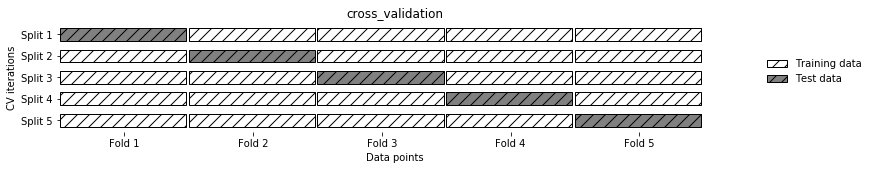

In [16]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증

scikit-learn의 교차 검증은 model_selection 모듈의 cross_val_score 함수로 구현됨
- 매개변수는 모델과 훈련 데이터, 타깃 레이블

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [19]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"cross val socre : {scores}")

cross val socre : [0.96666667 1.         0.93333333 0.96666667 1.        ]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# 보통 간단하게 나타내려고 평균을 냄

print(f"cross val mean score : {scores.mean()}")

cross val mean score : 0.9733333333333334


In [21]:
# cross_val_score 와 비슷한 결과를 주는데 dict로 리턴함

from sklearn.model_selection import cross_validate
res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'fit_time': array([0.01690888, 0.01739883, 0.01472616, 0.01435423, 0.01360679]),
 'score_time': array([0.00029111, 0.00030327, 0.00020576, 0.00019193, 0.00017214]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [24]:
res_df = pd.DataFrame(res)
display(res_df)

,fit_time,score_time,test_score,train_score
0,0.016909,0.000291,0.966667,0.966667
1,0.017399,0.000303,1.000000,0.966667
2,0.014726,0.000206,0.933333,0.983333
3,0.014354,0.000192,0.966667,0.983333
4,0.013607,0.000172,1.000000,0.975000


In [26]:
res_df.mean()

fit_time       0.015399
score_time     0.000233
test_score     0.973333
train_score    0.975000
dtype: float64

### 5.1.2 교차 검증의 장점

**장점**
- train_test_split은 무작위로 나눌 경우 운에 의해 데이터 셋이 결정됨(한쪽에 쏠릴 경우도 발생)
- 교차검증을 이용하면 테스트 세트에 각 샘플이 정확하게 한 번씩 들어감
  - 각 샘플은 폴드 중 하나에 속하며, 각 폴드는 한 번씩 테스트 세트가 됨
  - 그렇기 때문에 교차 검증의 점수를 높이기 위해서 모든 샘플에 있는 모델일 일반화가 잘 되어야 함
- 데이터를 여러개로 나누다 보면 모델이 train data에 얼마나 민감한지 알 수 있다.
  - iris 데이터로 90~100%가 나왔는데 범위가 넒음
  - 이를 바탕으로 새로운 데이터를 적용했을 때 최악과 최선의 경우를 짐작할 수 있음
- train_test_split처럼 분할을 한 번 하는 것보다 더 효율적으로 데이터를 사용 할 수 있음

**단점**
- 연산 비용 증가
- 대략 모델 개수만큼 느림

**Notice**
- 교차 검증은 새로운 데이터에 적용할 모델을 만드는 방법이 아니라는 것을 잊지 말아야 함
- 교차 검증 함수는 모델을 반환하지 않음
- 교차 검증의 목적은 단지 주어진 데이터셋에 학습된 알고리즘이 얼마나 잘 일반화될지 평가하는 것

### 5.1.3 계층별 K-겹 교차 검증과 그외 전략들

항상 K-fold로 나누는 건 좋지 않다. iris를 보자

In [27]:
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


- 1/3은 0 클래스, 1/3은 1 클래스, 나머지 1/3은 2 클래스
- 교차 검증을 하면 특정 데이터만 가지게 된다.
- 이를 방지하기 위해서는 Stratified k-fold cross-validation(계층별 k-겹 교차 검증)을 사용
  - 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눔

cross_val_score 함수에서 폴드를 나눌 때...
- 분류 : StratifiedKFold 사용
- 회귀 : 단순 KFold 사용

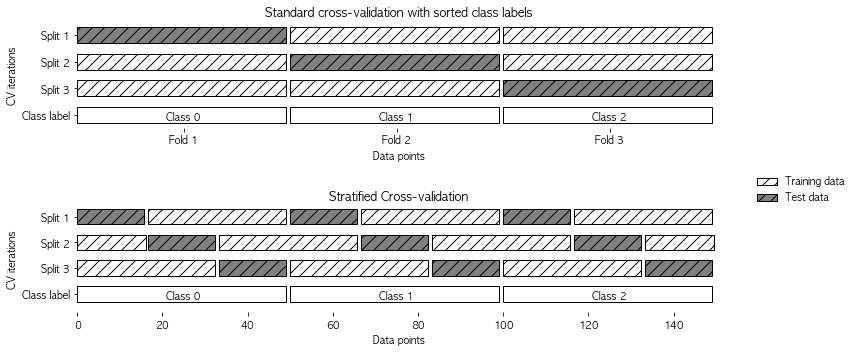

In [28]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션

- cv parameter를 이용하여 폴드 개수 조정
- 교차 검증 분할기(cross-validation splitter)를 전달함으로써 데이털르 분할할 때 더 세밀하게 제어 가능

In [29]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [30]:
print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

In [31]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


In [33]:
# KFold with suffle

kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/time_to_bye/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/li

#### LOOCV

- Leave-one-out cross-validation
- 교차 검증은 폴드 하나에 샘플 하나만 들어 있는 k-겹 교차 검증
- 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용
- 데이터셋이 클 때는 시간이 매우 오래 걸리지만, 작은 데이터셋에서는 이따금 더 좋은 결과를 가져옴

In [40]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 임의 분할 교차 검증
- 입력 예정

#### 그룹별 교차 검증
- 입력 예정

#### 반복 교차 검증
- 입력 예정

## 5.2 Grid search

매개 변수 튜닝
- 힘든 작업임
- 해야함
- 설정된 모든 조합을 해보는 것이라고 이해하면 편함

### 5.2.1 간단한 그리드 서치

In [41]:
# simple Grid seasrch

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters)) 

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 The danger of overfitting the parameters and the validation set(매개변수 과대적합과 검증 세트)

- 위의 결과 모델 정확도가 97%, 오버피팅의 위험성
- 이 정확도는 새로운 데이터에까지 이어지지 않을 수 있다.
- 매개변수를 조정하기 위해 테스트 세트를 이미 사용했기 때문에 모델이 얼마나 좋은지 펴가하는 데는 더 이상 사용할 수 없다.
- 즉, 평가를 위해서는 모델을 만들 때 사용하지 않은 독립된 데이터셋이 필요

이를 해결하기 위해..데이터를 다시 나눠서 세 개의 세트로 만들어 이 문제를 해결할 수 있다.
- 훈련 세트로 모델을 만들고, 검증(또는 개발) 세트로는 모델의 매개변수를 선택하고, 테스트 세트로는 선택된 매개변수의 성능을 평가

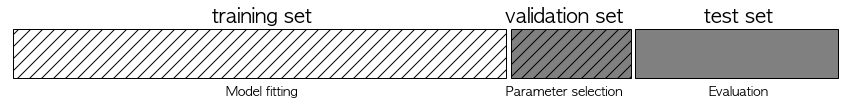

In [42]:
mglearn.plots.plot_threefold_split()

- 검증 세트를 사용해 최적의 매개변수를 선택한 후, 그 매개변수에서 훈련 세트와 검증 세트 데이터를 모두 이용해 모델을 다시 만듬
- 가능한 많은 데이터를 이용하기 위해서이다.

In [43]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        
        # evaluate the SVC on the validation set
        score = svm.score(X_valid, y_valid)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# rebuild a model on the combined training and validation set,
# and evaluate it on the test set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3 교차 검증을 사용한 그리드 서치

In [44]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [47]:
kfold = KFold(n_splits=10)

In [48]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # for each combination of parameters,
        # train an SVC
        svm = SVC(gamma=gamma, C=C)
        
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=kfold)
        
        # compute mean cross-validation accuracy
        score = np.mean(scores)
        
        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

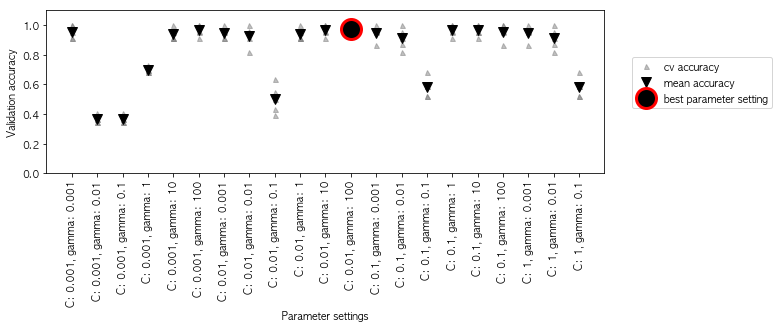

In [49]:
mglearn.plots.plot_cross_val_selection()

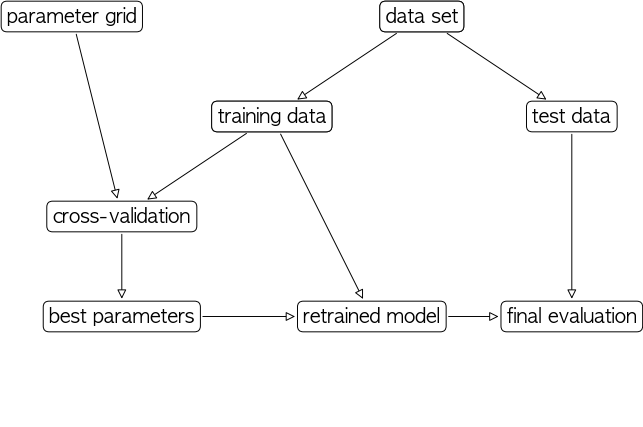

In [50]:
mglearn.plots.plot_grid_search_overview()

#### GridSearchCV 사용

In [51]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
}
print("Parameter grid:\n{}".format(param_grid))

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [52]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [54]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [56]:
print("Best parameters: {}".format(grid_search.best_params_))

# 최상의 교차 검증 정확도(이 매개변수 설정으로 각 분할에서 얻은 정확도의 평균)이 best_score_에 저장되어 있음
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


가끔은 만들어진 실제 모델에 직접 접근해야 할 때가 있다. 예를 들면...계수나 특성 중요도를 살필 때
- best_estimator_ 속성에서 얻을 수 있다.

In [57]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))


Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


### 교차 검증 결과 분석
- 그리드 서치의 결과는 cv_results_ 속성에 담김

In [58]:
# convert to Dataframe
results = pd.DataFrame(grid_search.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000572,0.000156,0.000297,0.000076,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000487,0.000032,0.000238,0.000009,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000514,0.000032,0.000262,0.000017,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000536,0.000047,0.000294,0.000040,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000482,0.000058,0.000253,0.000057,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


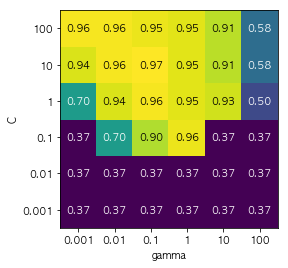

In [59]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

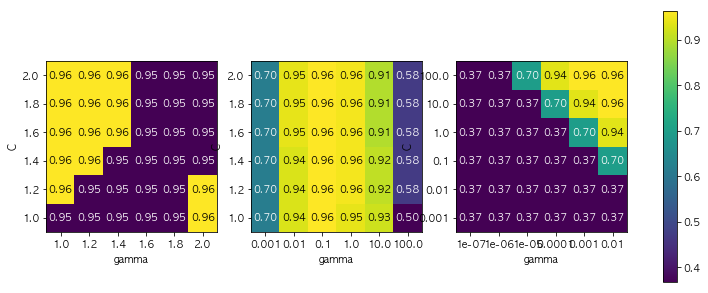

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

#### 비대칭 매개변수 그리드 탐색

- GridSearchCV에 전달할 param_grid를 딕셔너리의 리스트로 만들어서 전달하면, 비대칭 매개변수 적용 가능

In [64]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [65]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [66]:
results = pd.DataFrame(grid_search.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000539589,0.00050683,0.000516558,0.000630617,0.000512123,0.000447035,0.000516796,0.000435829,0.000457096,0.000445795,...,0.000281096,0.000359249,0.0005445,0.000598526,0.000478363,0.000406122,0.000338602,0.000442266,0.00054121,0.000466824
std_fit_time,0.000132685,7.52754e-05,5.56103e-05,6.26507e-05,7.42105e-05,4.44764e-06,0.000141559,2.64634e-06,2.61785e-05,4.12788e-06,...,6.7435e-06,5.13879e-06,1.33875e-05,5.48032e-05,7.83003e-05,3.88268e-05,4.57606e-05,9.08188e-05,0.000111339,5.87778e-05
mean_score_time,0.000244713,0.000270462,0.000271082,0.000336981,0.000259829,0.000228739,0.000234413,0.000225878,0.000227404,0.000226784,...,0.000199413,0.000213194,0.000222492,0.000229502,0.000269604,0.000218105,0.000206709,0.000269365,0.000320196,0.000261545
std_score_time,2.8096e-05,5.32727e-05,3.30349e-05,7.64251e-05,3.72429e-05,1.71661e-06,1.34053e-05,3.07033e-06,9.22159e-07,1.84924e-06,...,7.4157e-06,1.13977e-05,1.08834e-05,1.27402e-05,5.45687e-05,7.8561e-06,1.15794e-05,6.85378e-05,6.4331e-05,7.01296e-05
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,0.956522,0.869565,0.521739,0.347826,0.869565,1,1,1,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1,0.956522


### 중첩 교차 검증
- 내용 보강 할 것

## 5.3 평가 지표와 측정 - Evaluation Metrics and Scoring

### 5.3.1 생략

### 5.3.2 이진 분류의 평가 지표

- 이진 분류 : Positive class, Negative Class

#### 에러의 종류

정확도만으로 예측 성능을 측정하기에는 부족함


- 암진단
  - 양성 : 추가 검사 대상
  - 음성 : 건강


- 건강한 사람을 양성으로 분류하면...?
  - 잘못된 양성 예측을 거짓 양성이라고 함
  - false positive
  - type 1 error


- 암에 걸린 사람을 음성으로 분류
  - 잘못된 음성 예측 오류를 거짓 음성이라고 함
  - false negative
  - type 2 error

### Imbalanced datasets - 불균형 데이터셋
- 한 클래스가 다른 것보다 훨씬 많은 데이터셋을 불균형 데이터셋이라고 함
- 참고 : https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

In [67]:
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9 

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

In [68]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: {}".format(np.unique(pred_most_frequent)))
print("Test score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels: [False]
Test score: 0.90


- 90%가 나올리가...

In [69]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))

Test score: 0.92


In [70]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.83
logreg score: 0.98


### Confusion matrix - 오차 행렬
- 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix_result = confusion_matrix(y_test, pred_logreg)
print(confusion_matrix_result)

[[402   1]
 [  6  41]]


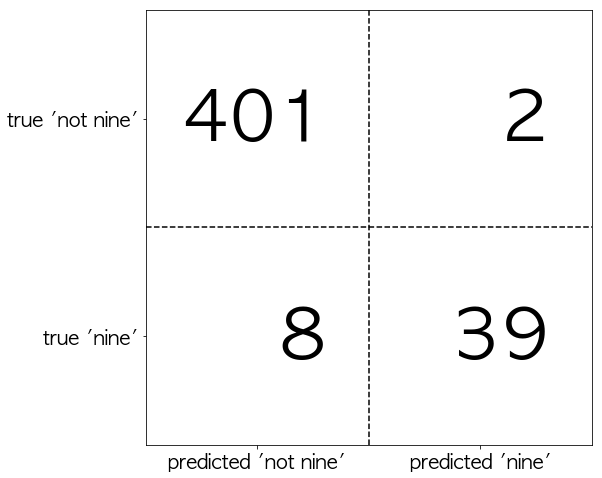

In [73]:
mglearn.plots.plot_confusion_matrix_illustration()

- 오차 행렬의 대각 행렬은 정확히 분류된 경우이고, 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우가 얼마나 많은지 알려줌
  - 대각 형렬? : A[i, i] ex) A[0, 0], A[1, 1]
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [76]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]
confusion_matrix(y_true, y_pred)

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [78]:
tn, fp, fn, tp = confusion_matrix([0, 1, 0, 1], [1, 1, 1, 0]).ravel()
(tn, fp, fn, tp)

(0, 2, 1, 1)

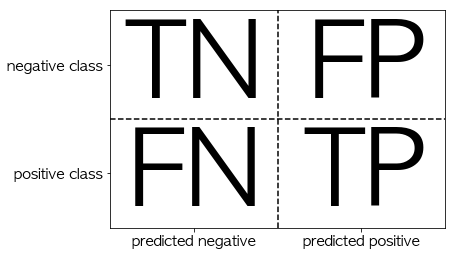

In [74]:
mglearn.plots.plot_binary_confusion_matrix()

- TP : 양성 클래스를 양성으로 예측함
- TN : 음성 클래스를 음성으로 예측함
- FP : 음성 클래스를 양성으로 잘못 예측함
- FN : 양성 클래스를 음성으로 잘못 예측함

In [75]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[359  44]
 [ 44   3]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


#### 정확도와의 관계